## BIOS512 Final Project: Nobel Prize: why is U.S.A. so dominant?
 
 ##### Michael Lee (730237421)
 ##### Professor Chuck
 ##### December 9th, 2021



In [1]:
library('tidyverse')
library('readxl')
library ('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
nobel = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-14/nobel_winners.csv',
                col_types = cols()
)

print(nobel)

# A tibble: 969 × 18
   prize_year category   prize  motivation prize_share laureate_id laureate_type
        <dbl> <chr>      <chr>  <chr>      <chr>             <dbl> <chr>        
 1       1901 Chemistry  The N… "\"in rec… 1/1                 160 Individual   
 2       1901 Literature The N… "\"in spe… 1/1                 569 Individual   
 3       1901 Medicine   The N… "\"for hi… 1/1                 293 Individual   
 4       1901 Peace      The N…  NA        1/2                 462 Individual   
 5       1901 Peace      The N…  NA        1/2                 463 Individual   
 6       1901 Physics    The N… "\"in rec… 1/1                   1 Individual   
 7       1902 Chemistry  The N… "\"in rec… 1/1                 161 Individual   
 8       1902 Literature The N… "\"the gr… 1/1                 571 Individual   
 9       1902 Medicine   The N… "\"for hi… 1/1                 294 Individual   
10       1902 Peace      The N…  NA        1/2                 464 Individual   
# … wit

This data set contains a set of all relevant information about each of the noble prize winner since 1901 to 2021. More specifically I want to explore different countries and make notice about trends in relationship to an important milestone of that specifically country.  

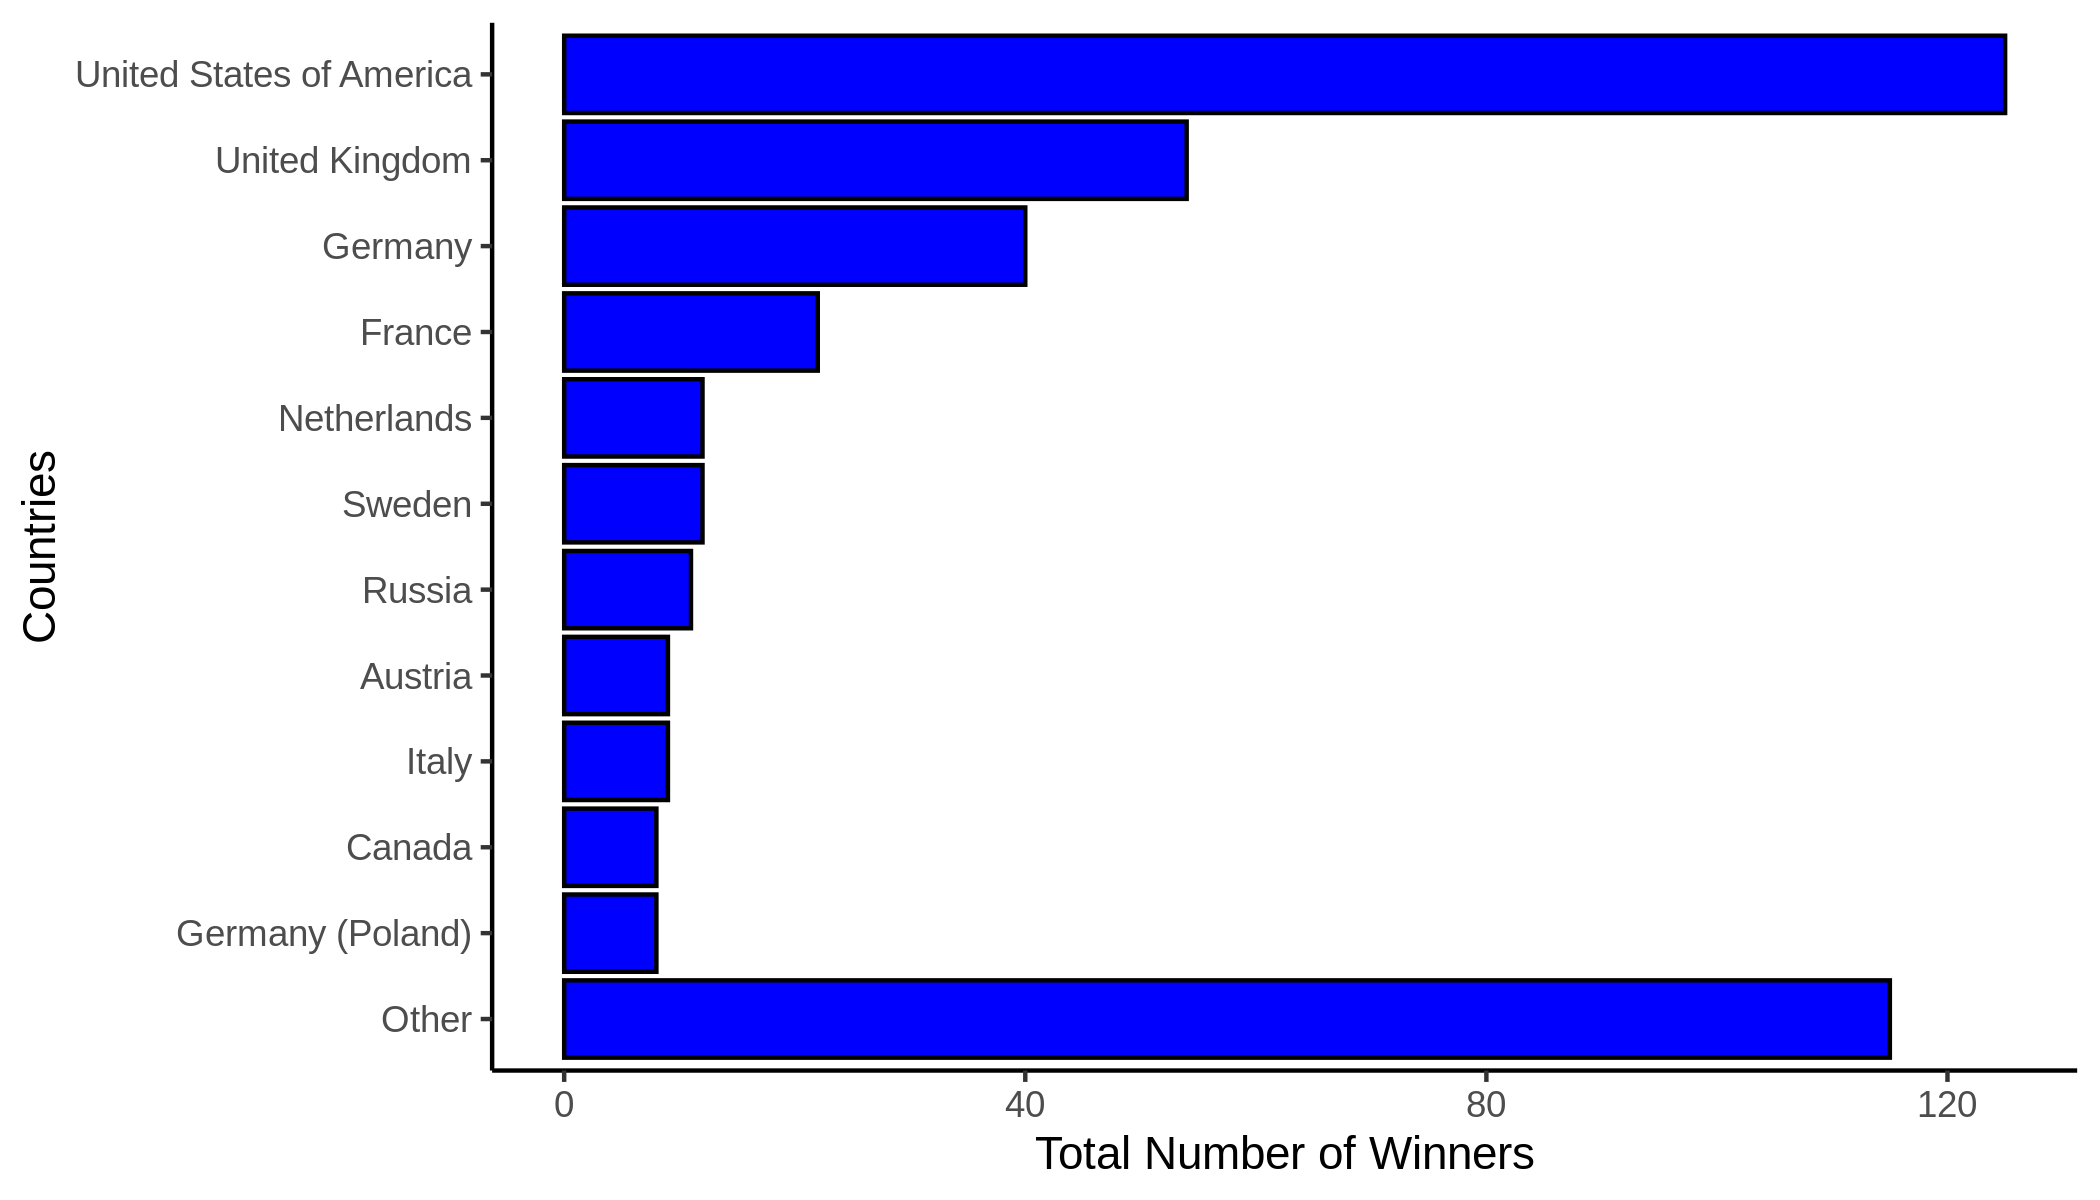

In [3]:
options(repr.plot.width = 7, repr.plot.height = 4)

df_sorted = nobel %>%
    drop_na %>%
    group_by(birth_country) %>%
    mutate(n = n()) %>%
    ungroup() %>% # Why do we need to ungroup?
    arrange(n) %>%
    mutate(country_sorted = 
           birth_country %>%
           fct_lump(n = 10) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev()
    )
           
p = ggplot(df_sorted, aes(x = country_sorted))

p = p + geom_bar(color="Black", fill="Blue") + coord_flip()

p = p + theme_classic()

p = p + labs(y = 'Total Number of Winners', x = 'Countries')

p

In [4]:
new_df_sorted = nobel %>%
    group_by(organization_country) %>%
    mutate(n = n()) %>%
    ungroup() %>% # Why do we need to ungroup?
    arrange(n) %>%
    mutate(country_sorted = 
           birth_country %>%
           fct_lump(n = 10) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev()
    )

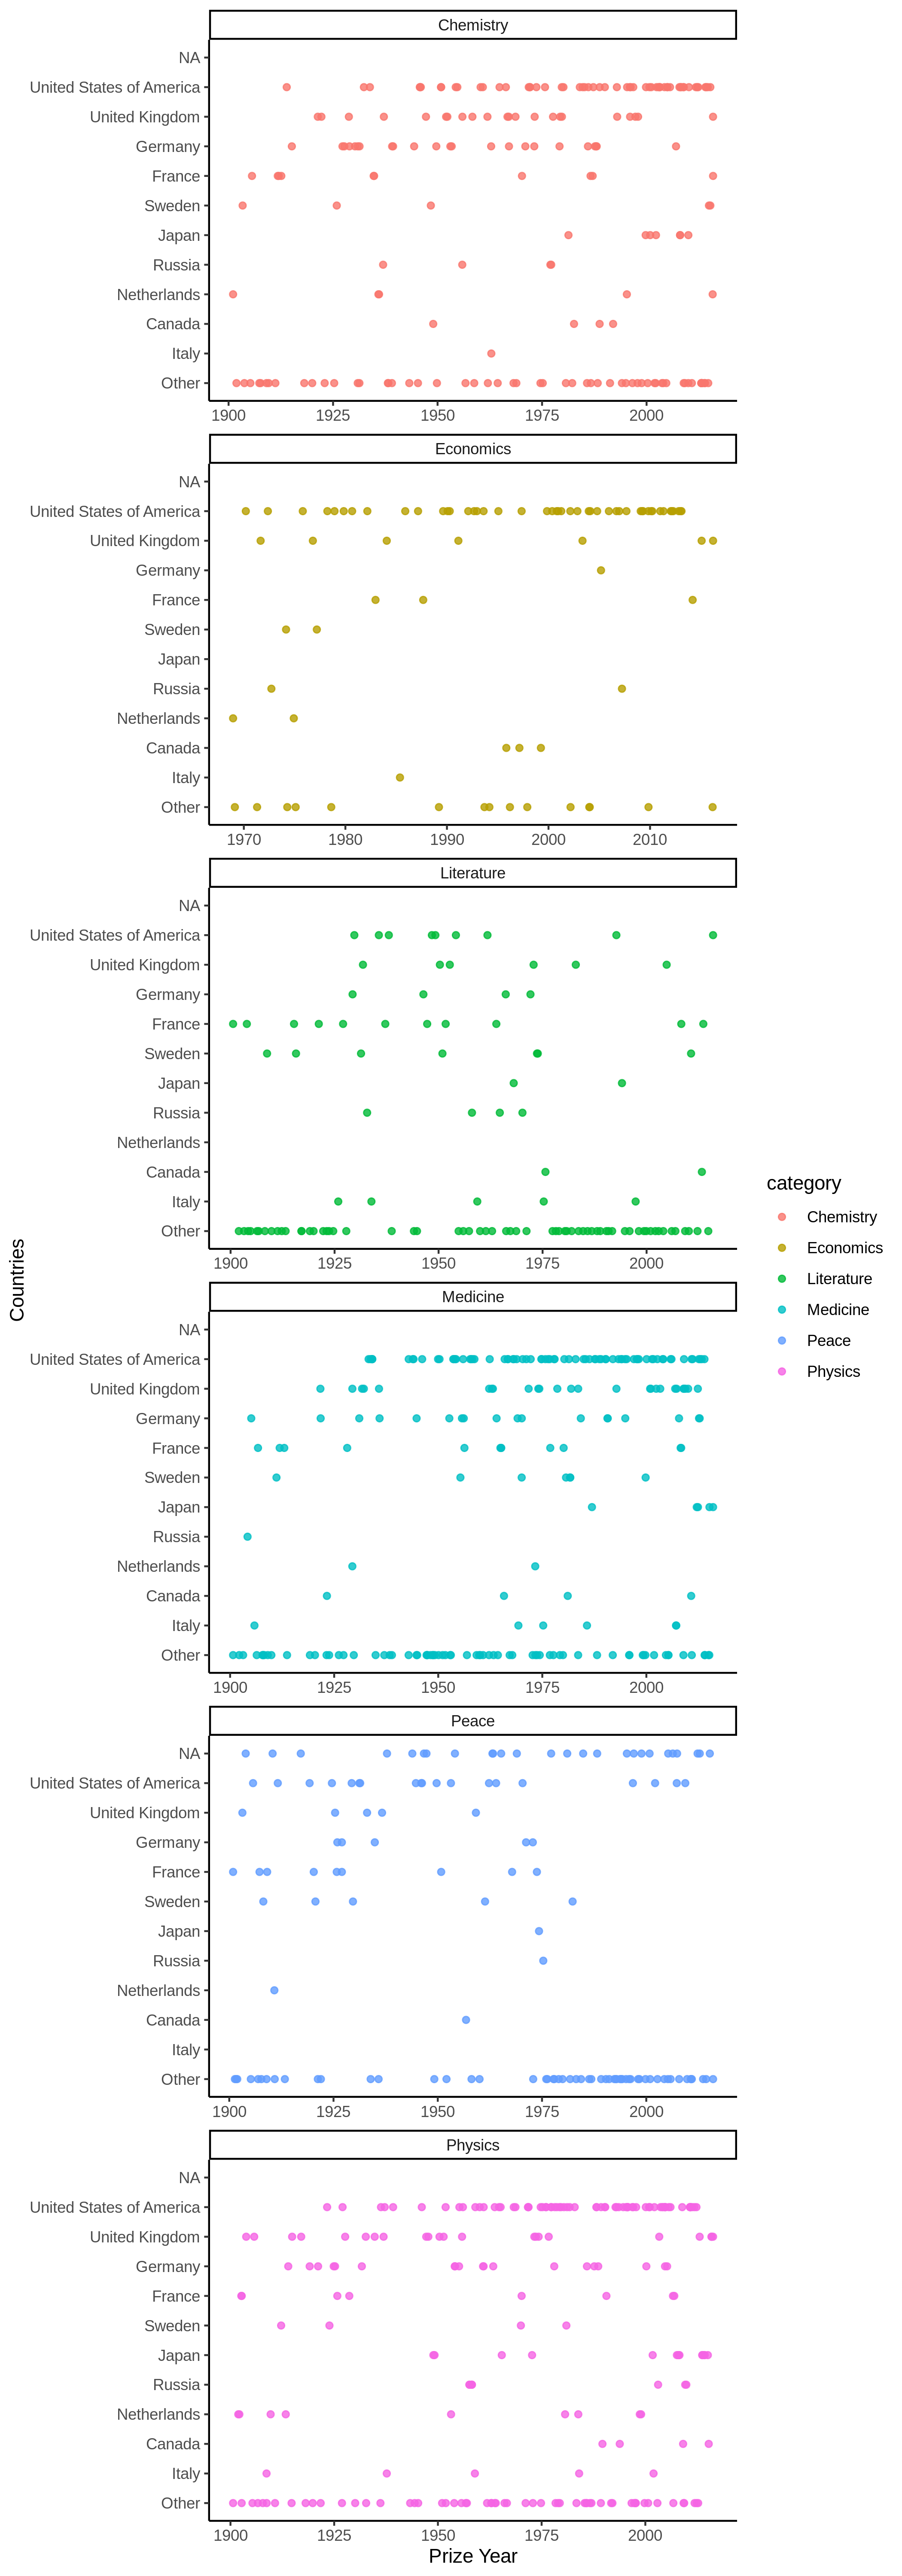

In [5]:
options(repr.plot.width = 7, repr.plot.height = 20)

p = ggplot(new_df_sorted, aes(x=prize_year, y=country_sorted, color=category))

p = p + geom_point(position = position_jitter(h=0),alpha=0.8)
p = p + facet_wrap(~category, ncol=1, scales = 'free_x')

p = p + labs(y = 'Countries', x = 'Prize Year')
p = p + theme_classic()

p

Above is a bar graph of top 10 countries by total number of winners. It is pretty evident that the distribution of winner across the globe is pretty wide (as seen my the large "Other" category). However, I am very intriged by United States which seems to have nearly 3 times more winnder than the 2nd highest number of winner (United Kingdom) and more than all of the winner of the "Other" Category. So I faceted the graph by cateogry to make sure that United States was indeed winning across the Nobel category board. This seemed to be the case except "Peace". So I decided to dig a little deeper at winners of United States.

In [6]:
df_USA = nobel %>%
    filter(organization_country == "United States of America") %>%
    arrange(prize_year) %>%
    mutate(rn = row_number(), fraction = rn/max(rn))

In [7]:
p = ggplot(df_USA, aes(x = prize_year, y = category))

p = p + geom_point(position = position_jitter(h=0.15),alpha=0.8,aes(color=prize_year))+ 
    scale_color_distiller(palette = 'Set1')

p = p + labs(x="Prize Year", y="Win Category")

p = p + theme_classic()

p = p + scale_x_continuous()

p = p + geom_vline(aes(xintercept = 1945), linetype = "dashed", color = "Blue")
p = p + geom_text_repel(
    data = data.frame(prize_year= 1945, category=0),
    nudge_x = -10.5,
    nudge_y = 0.5,
    label = "World War 2",
    hjust = "right",
    arrow = arrow(length = unit(0.025, "npc")))


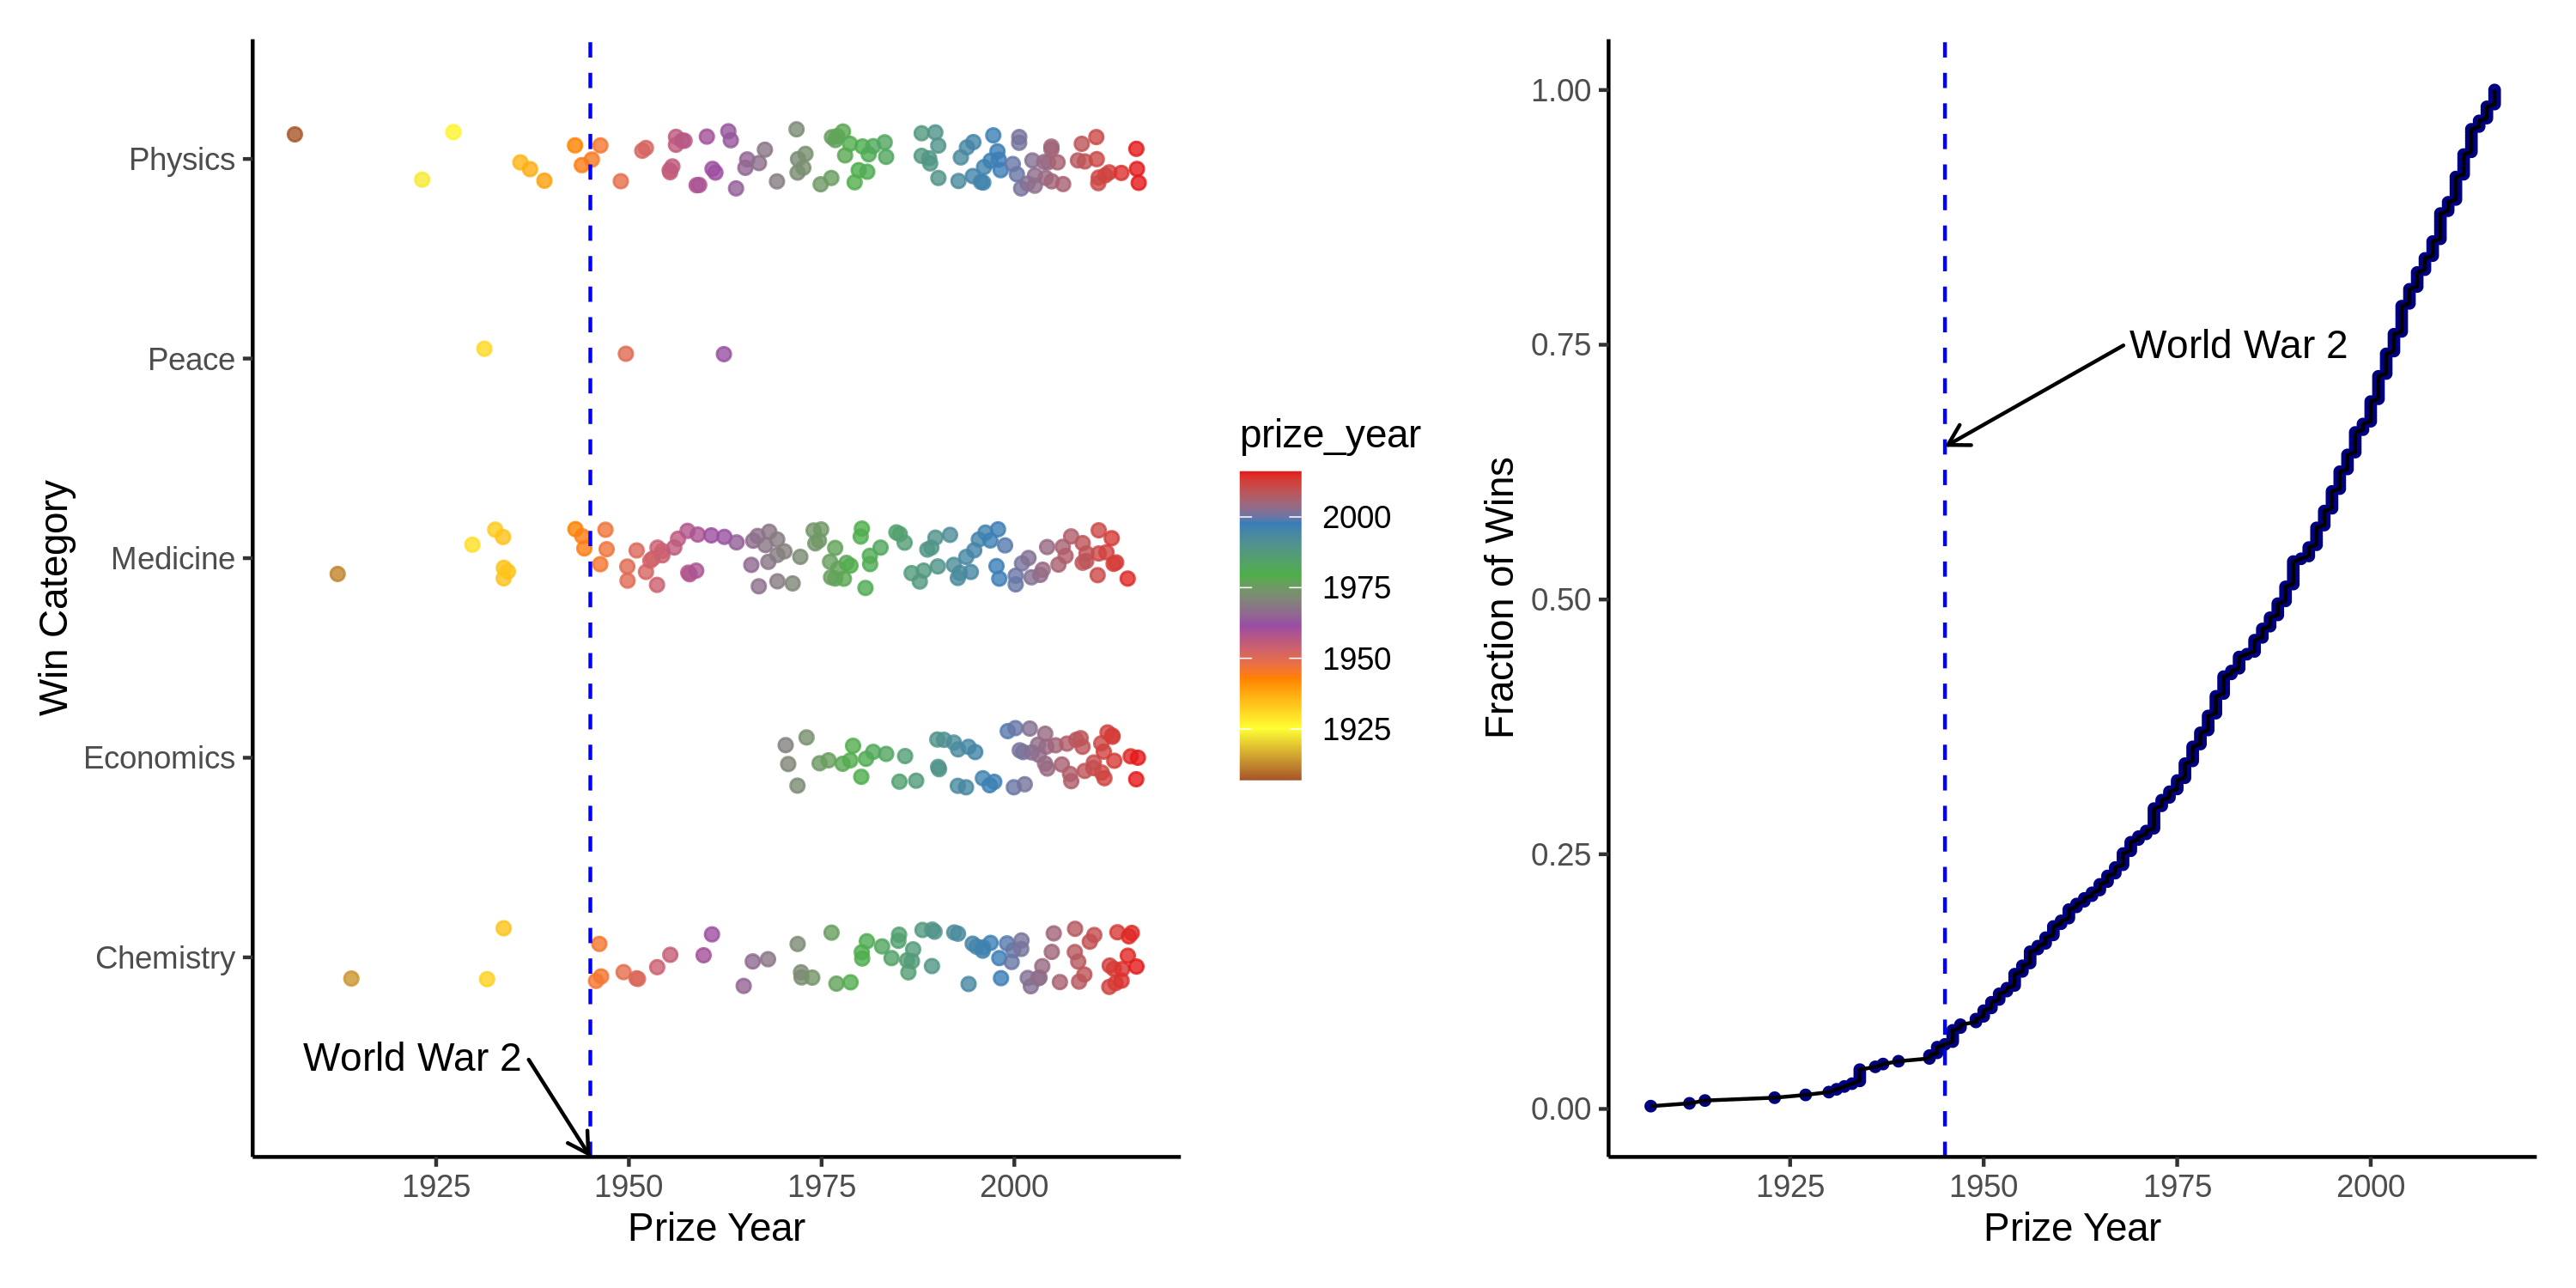

In [8]:
q = ggplot(df_USA, aes(x=prize_year, y=fraction))

q = q + geom_point(size = 1, color = "Navy Blue") + geom_line()

q = q + labs(x="Prize Year", y="Fraction of Wins")

q = q + theme_classic()

q = q + scale_x_continuous()

q = q + geom_vline(aes(xintercept = 1945), linetype = "dashed", color = "Blue")
q = q + geom_text_repel(
    data = data.frame(prize_year= 1945, fraction = 0.65),
    nudge_x = 50.5,
    nudge_y = 0.10,
    label = "World War 2",
    hjust = "right",
    arrow = arrow(length = unit(0.025, "npc"))

)
options(repr.plot.width = 10, repr.plot.height = 5, resolution=350)

p + q

To get an even better understanding of why United States has won so many Nobel Prize. I divided the graphs by category of wins (Chemistry, Physic, Medicine, Economics, Peace, Literature). I noticed that United States near around the 1950s started winning in almost all categories.(See the Geom_point graph above) So I filtered just for United States and noticed that World War 2 was around the mid 20th century. Using both visualization of geom_point and ecdf plot which I manually calculated the fractions using summarise() in dplyr, I was able to see a huge spike in number of wins in almost all category(Except 'Peace'...which admittedly can be dramatically improved from US's standpoint) after 1945 or the end of World War 2. Innovation and Technology usually follows great tragedies and this was definitely the case in United States.